<a href="https://colab.research.google.com/github/ambreenraheem/PGD_generative_AI_NED/blob/main/Gemini_API_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Get started with the Gemini API: Python

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://ai.google.dev/gemini-api/docs/get-started/python"><img src="https://ai.google.dev/static/site-assets/images/docs/notebook-site-button.png" height="32" width="32" />View on Google AI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

This quickstart demonstrates how to use the Python SDK for the Gemini API, which gives you access to Google's Gemini large language models. In this quickstart, you will learn how to:

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodal inputs (text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

## Prerequisites

You can run this quickstart in [Google Colab](https://colab.research.google.com/github/google/generative-ai-docs/blob/main/site/en/gemini-api/docs/get-started/python.ipynb), which runs this notebook directly in the browser and does not require additional environment configuration.

Alternatively, to complete this quickstart locally, ensure that your development environment meets the following requirements:

-  Python 3.9+
-  An installation of `jupyter` to run the notebook.

## Setup

### Install the Python SDK

The Python SDK for the Gemini API, is contained in the [`google-generativeai`](https://pypi.org/project/google-generativeai/) package. Install the dependency using pip:

In [2]:
!pip install -q -U google-generativeai

### Import packages

Import the necessary packages.

In [1]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text)->Markdown:
    text : str = text.replace("•", "  *")
    return Markdown(textwrap.indent(text, "> ", predicate=lambda _: True))

In [3]:
# Used to securely store your API key
from google.colab import userdata

### Setup your API key

Before you can use the Gemini API, you must first obtain an API key. If you don't already have one, create a key with one click in Google AI Studio.

<a class="button button-primary" href="https://makersuite.google.com/app/apikey" target="_blank" rel="noopener noreferrer">Get an API key</a>

Note that depending on where you are located, you might have to [enable billing](https://ai.google.dev/gemini-api/docs/billing#enable-cloud-billing) since the free tier is not available in [EEA (including EU), the UK, and CH](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)

In Colab, add the key to the secrets manager under the "🔑" in the left panel. Give it the name `GEMINI_API_KEY`.

Once you have the API key, pass it to the SDK. You can do this in two ways:

* Put the key in the `GEMINI_API_KEY` environment variable (the SDK will automatically pick it up from there).
* Pass the key to `genai.configure(api_key=...)`

In [5]:
# Or use `os.getenv('GEMINI_API_KEY')` to fetch an environment variable.
GEMINI_API_KEY : str = userdata.get("GEMINI_API_KEY")

genai.configure(api_key=GEMINI_API_KEY)

## List models

Now you're ready to call the Gemini API. Use `list_models` to see the available Gemini models:

* `gemini-1.5-flash`: optimized for multi-modal use-cases where speed and cost are important. This should be your go-to model.
* `gemini-1.5-pro`: optimized for high intelligence tasks, the most powerful Gemini model

In [6]:
list(genai.list_models())

[Model(name='models/embedding-gecko-001',
       base_model_id='',
       version='001',
       display_name='Embedding Gecko',
       description='Obtain a distributed representation of a text.',
       input_token_limit=1024,
       output_token_limit=1,
       supported_generation_methods=['embedText', 'countTextTokens'],
       temperature=None,
       max_temperature=None,
       top_p=None,
       top_k=None),
 Model(name='models/gemini-1.0-pro-vision-latest',
       base_model_id='',
       version='001',
       display_name='Gemini 1.0 Pro Vision',
       description=('The original Gemini 1.0 Pro Vision model version which was optimized for '
                    'image understanding. Gemini 1.0 Pro Vision was deprecated on July 12, 2024. '
                    'Move to a newer Gemini version.'),
       input_token_limit=12288,
       output_token_limit=4096,
       supported_generation_methods=['generateContent', 'countTokens'],
       temperature=0.4,
       max_temperature=Non

generateContent means (Multimodal):

Multimodal refers to the ability of the model to handle inputs from different modalities, such as text and images, as mentioned in this markdown cell.



In [7]:
for m in genai.list_models():
    if "generateContent" in m.supported_generation_methods:
        print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-2.5-pro-preview-03-25
models/gemini-2.5-flash-preview-04-17
models/gemini-2.5-flash-preview-05-20
models/gemini-2.5-flash
models/gemini-2.5-flash-preview-04-17-thinking
models/gemini-2.5-flash-lite-preview-06-17
models/gemini-2.5-pro-preview-05-06
models/gemini-2.5-pro-preview-06-05
models/gemini-2.5-pro
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-exp-image-generation
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-preview-image-generation
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp

Note: For detailed information about the available models, including their capabilities and rate limits, see [Gemini models](https://ai.google.dev/models/gemini). There are options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Flash models is 15 requests per minute (RPM) for free ([in supported countries](https://ai.google.dev/gemini-api/docs/billing#is-Gemini-free-in-EEA-UK-CH)).

The `genai` package also supports the PaLM  family of models, but only the Gemini models support the generic, multimodal capabilities of the `generateContent` method.

## Generate text from text inputs

Always start with the 'gemini-1.5-flash' model. It should be sufficient for most of your tasks:

In [8]:
from google.generativeai import GenerativeModel

model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

The `generate_content` method can handle a wide variety of use cases, including multi-turn chat and multimodal input, depending on what the underlying model supports. At the moment, the available models support text, images and videos as input, and text as output.

In the simplest case, you can pass a prompt string to the <a href="https://ai.google.dev/api/generate-content#v1beta.models.generateContent"><code>GenerativeModel.generate_content</code></a> method:

In [9]:
%%time
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("What is the meaning of life?")
response.text

CPU times: user 84.3 ms, sys: 5.95 ms, total: 90.3 ms
Wall time: 3.86 s


"There's no single, universally accepted answer to the meaning of life.  It's a question that has been pondered by philosophers, theologians, and individuals for centuries.  The meaning of life is often considered a deeply personal and subjective matter.\n\nSome perspectives include:\n\n* **Nihilism:**  The belief that life is inherently without meaning or purpose.\n* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.\n* **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that we should embrace this absurdity.\n* **Spiritual and Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment or salvation.\n* **Hedonism:** The pursuit of pleasure and avoidance of pain as the primary purpose of life.\n* **Humanism:**  Focusing on human values, reason, ethics

In simple cases, the `response.text` accessor is all you need. To display formatted Markdown text, use the `to_markdown` function:

In [10]:
to_markdown(response.text)

> There's no single, universally accepted answer to the meaning of life.  It's a question that has been pondered by philosophers, theologians, and individuals for centuries.  The meaning of life is often considered a deeply personal and subjective matter.
> 
> Some perspectives include:
> 
> * **Nihilism:**  The belief that life is inherently without meaning or purpose.
> * **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.
> * **Absurdism:** The belief that the search for meaning in a meaningless universe is inherently absurd, but that we should embrace this absurdity.
> * **Spiritual and Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, following divine commandments, or achieving enlightenment or salvation.
> * **Hedonism:** The pursuit of pleasure and avoidance of pain as the primary purpose of life.
> * **Humanism:**  Focusing on human values, reason, ethics, and social justice.  Finding meaning in contributing to humanity and improving the lives of others.
> * **Purpose-driven life:**  Finding meaning through pursuing goals, contributing to something larger than oneself (work, family, community), and leaving a positive impact.
> 
> Ultimately, the meaning of life is what you make it.  It's a question of personal values, beliefs, and experiences.  It's a journey of self-discovery rather than a destination with a single, definitive answer.


If the API failed to return a result, use `GenerateContentResponse.prompt_feedback` to see if it was blocked due to safety concerns regarding the prompt.

In [11]:
%%time
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("What is GEMINI?")
response.text

CPU times: user 55.3 ms, sys: 2.74 ms, total: 58 ms
Wall time: 2.6 s


'GEMINI refers to several things, depending on the context.  The most prominent current use is:\n\n* **Google\'s Gemini:** This is Google\'s large language model (LLM), comparable to OpenAI\'s GPT models and Meta\'s Llama models. It\'s designed for a variety of tasks, including text generation, code generation, translation, question answering, and more.  It comes in several sizes and capabilities, optimized for different applications.\n\nHowever, "GEMINI" could also refer to other things, though less commonly now:\n\n* **Other AI models or projects:**  There might be other, less well-known AI projects or models using the name "Gemini."  Without more context, it\'s impossible to say for sure.\n* **Historical/older meanings:** The name "Gemini" might have other meanings in older or less common contexts.\n\n\nIf you encountered "GEMINI" in a specific context, providing that context will help determine the precise meaning.\n'

In [12]:
to_markdown(response.text)

> GEMINI refers to several things, depending on the context.  The most prominent current use is:
> 
> * **Google's Gemini:** This is Google's large language model (LLM), comparable to OpenAI's GPT models and Meta's Llama models. It's designed for a variety of tasks, including text generation, code generation, translation, question answering, and more.  It comes in several sizes and capabilities, optimized for different applications.
> 
> However, "GEMINI" could also refer to other things, though less commonly now:
> 
> * **Other AI models or projects:**  There might be other, less well-known AI projects or models using the name "Gemini."  Without more context, it's impossible to say for sure.
> * **Historical/older meanings:** The name "Gemini" might have other meanings in older or less common contexts.
> 
> 
> If you encountered "GEMINI" in a specific context, providing that context will help determine the precise meaning.


In [13]:
response.prompt_feedback

Gemini can generate multiple possible responses for a single prompt. These possible responses are called `candidates`, and you can review them to select the most suitable one as the response.

View the response candidates with <a href="https://ai.google.dev/api/python/google/generativeai/protos/GenerateContentResponse#candidates"><code>GenerateContentResponse.candidates</code></a>:

In [14]:
response.candidates[0].content.parts[0].text

'GEMINI refers to several things, depending on the context.  The most prominent current use is:\n\n* **Google\'s Gemini:** This is Google\'s large language model (LLM), comparable to OpenAI\'s GPT models and Meta\'s Llama models. It\'s designed for a variety of tasks, including text generation, code generation, translation, question answering, and more.  It comes in several sizes and capabilities, optimized for different applications.\n\nHowever, "GEMINI" could also refer to other things, though less commonly now:\n\n* **Other AI models or projects:**  There might be other, less well-known AI projects or models using the name "Gemini."  Without more context, it\'s impossible to say for sure.\n* **Historical/older meanings:** The name "Gemini" might have other meanings in older or less common contexts.\n\n\nIf you encountered "GEMINI" in a specific context, providing that context will help determine the precise meaning.\n'

By default, the model returns a response after completing the entire generation process. You can also stream the response as it is being generated, and the model will return chunks of the response as soon as they are generated.

To stream responses, use <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content(..., stream=True)</code></a>.

In [15]:
%%time

from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("What is the meaning of life?", stream=True)

CPU times: user 103 ms, sys: 5.62 ms, total: 109 ms
Wall time: 3.69 s


In [16]:
for chunk in response:
    print(chunk.text)
    print("_" * 80)

There
________________________________________________________________________________
's no single, universally accepted answer to the meaning of life.  It
________________________________________________________________________________
's a question that has been pondered by philosophers, theologians, and individuals for
________________________________________________________________________________
 centuries.  The meaning of life is often considered a deeply personal and subjective matter.

Some perspectives include:

* **Nihilism:**  The belief
________________________________________________________________________________
 that life is inherently meaningless.
* **Existentialism:**  The belief that life is inherently meaningless, but we create our own meaning through our choices and
________________________________________________________________________________
 actions.
* **Absurdism:**  The belief that the search for meaning in a meaningless universe is inherently absurd, but

When streaming, some response attributes are not available until you've iterated through all the response chunks. This is demonstrated below:

In [17]:
from google.generativeai.types.generation_types import GenerateContentResponse

response: GenerateContentResponse = model.generate_content("What is the meaning of life?", stream=True)

The `prompt_feedback` attribute works:

In [18]:
response.prompt_feedback

But attributes like <code>text</code> do not:

In [19]:
try:
    response.text
except Exception as e:
    print(f"{type(e).__name__}: {e}")

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)


In [20]:
response.resolve()


In [21]:
response.text

"The meaning of life is a question that has been pondered by philosophers, theologians, and individuals for millennia. There's no single, universally accepted answer.  The meaning is often considered subjective and personal, varying greatly depending on individual beliefs, values, and experiences.\n\nSome common perspectives include:\n\n* **Nihilism:**  The belief that life is inherently without meaning or purpose.\n* **Existentialism:** The belief that individuals create their own meaning and purpose through their choices and actions.\n* **Absurdism:**  The belief that the search for meaning in a meaningless universe is inherently absurd, yet we must continue to search anyway.\n* **Spiritual or Religious Beliefs:** Many religions offer answers about the meaning of life, often involving serving a higher power, achieving enlightenment, or following a divine plan.\n* **Hedonism:** The belief that the meaning of life is to maximize pleasure and minimize pain.\n* **Humanism:**  Focuses on 

## Generate text from image and text inputs

The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [22]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  1430k      0 --:--:-- --:--:-- --:--:-- 1431k


In [23]:
pwd

'/content'

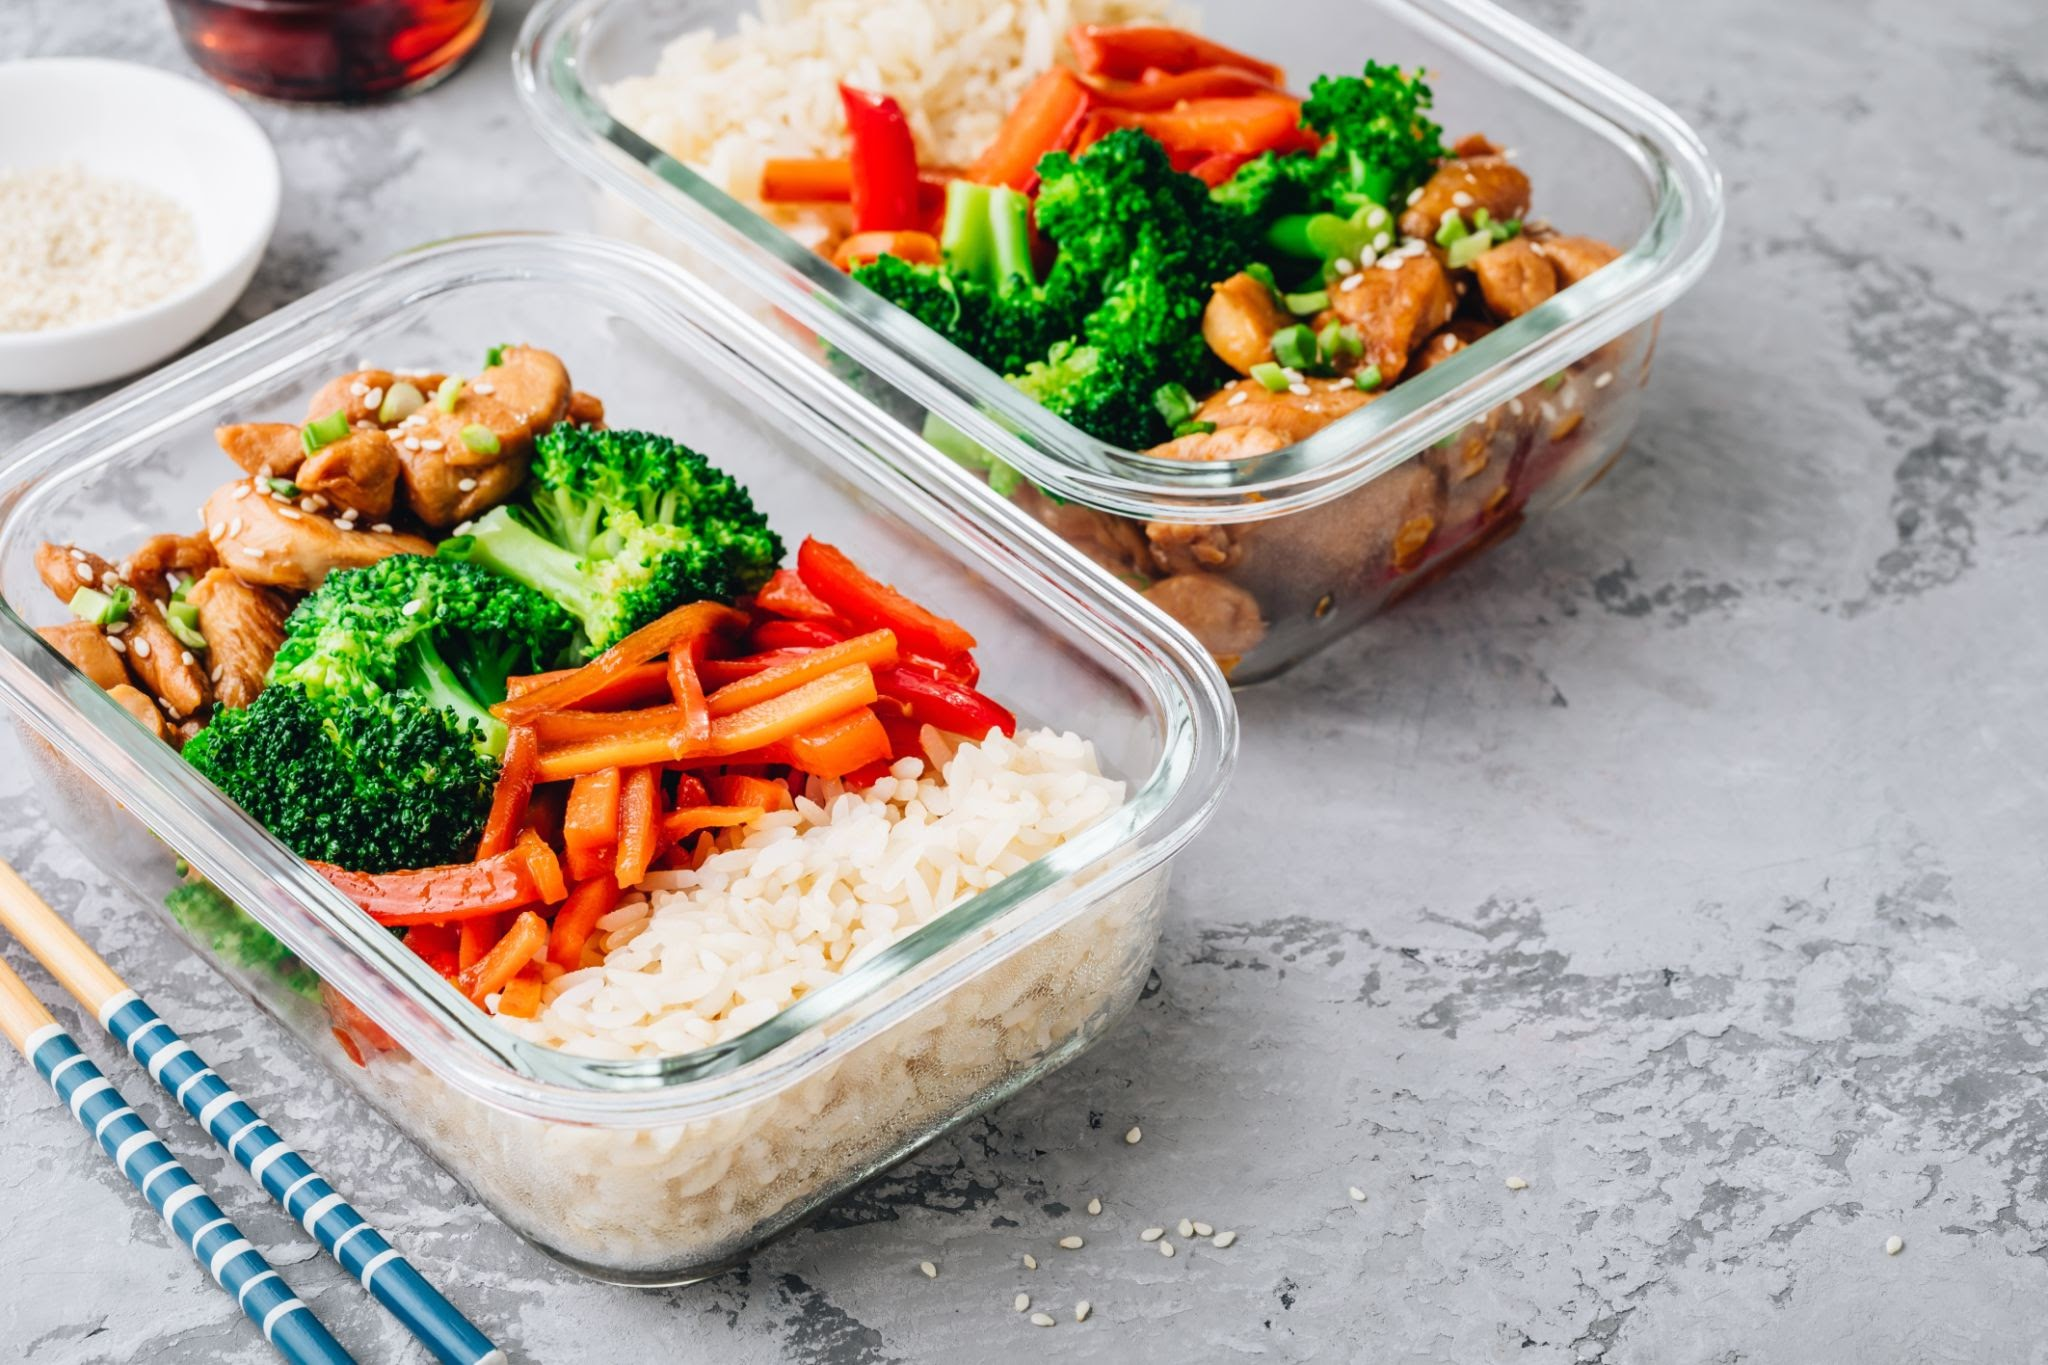

In [24]:
import PIL.Image

img = PIL.Image.open("/content/image.jpg")
img

Use the `gemini-1.5-flash` model and pass the image to the model with `generate_content`.

In [25]:
model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [26]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(img)

to_markdown(response.text)

> Here is a description of the image:
> 
> High-angle, close-up view of two glass meal prep containers filled with a teriyaki chicken and vegetable stir-fry. 
> 
> 
> Here's a breakdown of the contents:
> 
> * **The Food:** Each container holds cooked brown rice as a base. On top of the rice is teriyaki chicken, steamed broccoli florets, and sliced carrots and red bell peppers. The chicken is glistening and appears to be seasoned with sesame seeds.
> 
> * **The Containers:** The containers are clear glass, rectangular, and appear to be designed for food storage. They are partially filled, allowing the contents to be clearly visible.
> 
> * **The Setting:** The containers rest on a mottled gray textured surface, possibly a countertop. A small white bowl with sesame seeds and a dark glass bottle (likely containing soy sauce) are partially visible in the background. A pair of chopsticks with blue and white stripes lies in the foreground.
> 
> 
> The overall impression is one of healthy, home-cooked meals prepared in advance. The image is well-lit and the food is presented attractively.


To provide both text and images in a prompt, pass a list containing the strings and images:

In [40]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.",
        img,
    ],
    stream=True,
)
response.resolve()

In [32]:
IMAGE='GARAGE.jpg'

In [33]:
pwd

'/content'

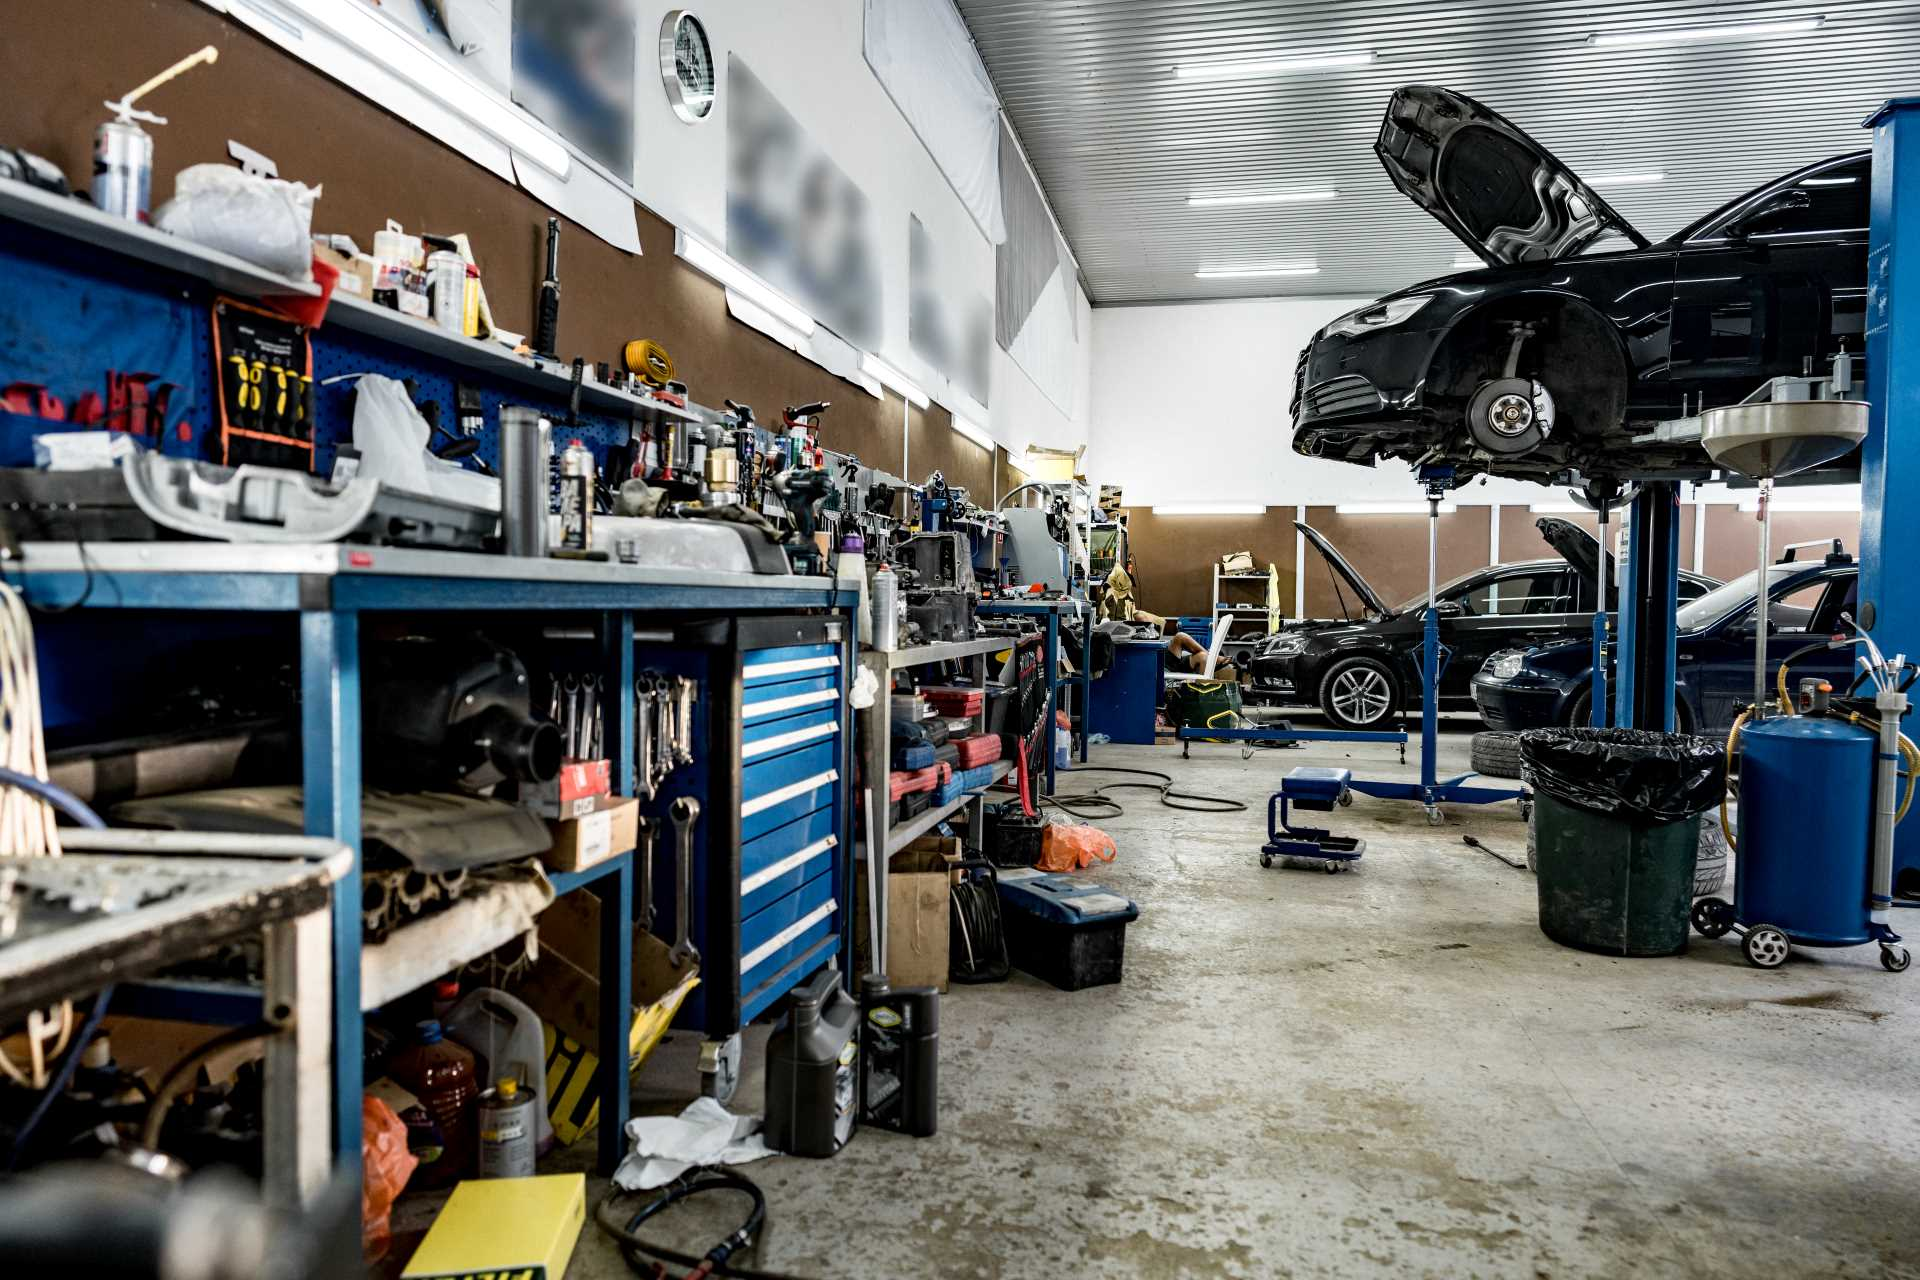

In [35]:
import PIL.Image

img = PIL.Image.open(IMAGE)
img

In [36]:
model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

In [37]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(img)

to_markdown(response.text)

> Here's a description of the image:
> 
> The photo shows a cluttered but organized auto repair shop. 
> 
> 
> Here's a breakdown of the scene:
> 
> * **Foreground:** The immediate foreground shows a section of workbench with various tools, parts, and containers scattered around. There are oil containers, wrenches, and other mechanical supplies visible.  The floor is a worn concrete surface typical of a garage.
> 
> * **Midground:** The main focus is a series of well-used workbenches lined with drawers and shelves crammed with tools and supplies. The tools appear to be well-used and in various states of order.  A blue rolling toolbox is prominent. There are two cars partially visible, one raised on a hoist and one partially visible under repair.
> 
> * **Background:** In the background,  more cars are visible, some with their hoods open, suggesting they are undergoing repairs. There are shelves with parts and equipment visible on the walls. The ceiling is high with industrial lighting fixtures.
> 
> The overall impression is one of a busy, functional workspace, with signs of ongoing projects and a variety of equipment readily available to the mechanics. The lighting is bright and even, illuminating the space well. The scene is realistic and not overly staged, giving a sense of authenticity to a typical auto repair bay.


To provide both text and images in a prompt, pass a list containing the strings and images:

In [41]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(
    [
        "Write a short, engaging blog post based on this picture. It should include a description of the REPAIR SHOP in the photo and talk about the importance of REPAIR SHOP.",
        img,
    ],
    stream=True,
)
response.resolve()

In [42]:
to_markdown(response.text)

> ## The Unsung Heroes of the Road: Why We Need Repair Shops
> 
> Step into this image, and you'll find yourself in the heart of a bustling repair shop.  It's a world of organized chaos, a symphony of tools and parts humming with the potential for revitalization.  Rows of well-worn workbenches, overflowing with everything from wrenches and screwdrivers to mysterious containers of fluids, tell a story of countless repairs and countless satisfied customers.  A car sits proudly aloft on a hoist, its hood open, ready for the expert care awaiting it.
> 
> This isn't just a garage; it's a lifeline.  Repair shops, often overlooked in our fast-paced, throwaway culture, are vital to our communities and our environment.  They breathe new life into our aging vehicles, extending their lifespan and reducing the demand for new manufacturing – which in turn lowers our carbon footprint. 
> 
> Think about it:  a perfectly functioning repair shop means fewer cars ending up in landfills.  It means less reliance on new parts, reducing strain on resources and minimizing waste.  Furthermore, local repair shops provide invaluable jobs and contribute directly to the economic health of our towns and cities.
> 
> Beyond the environmental and economic benefits, repair shops represent a critical skill set, the kind of hands-on know-how that keeps our society moving.  The mechanics who work here aren't just fixing cars; they're problem-solvers, innovators, and keepers of a valuable trade.
> 
> So next time you think about simply replacing something that's broken, consider the repair shop.  It may just be the most sustainable and sensible option, and a vital piece of the puzzle for a healthier and more resilient world.


## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [43]:

from google.generativeai.types.generation_types import GenerateContentResponse
from google.generativeai.generative_models import ChatSession


model : GenerateContentResponse = genai.GenerativeModel("gemini-1.5-flash")


chat : ChatSession = model.start_chat(history=[])
chat

ChatSession(
    model=genai.GenerativeModel(
        model_name='models/gemini-1.5-flash',
        generation_config={},
        safety_settings={},
        tools=None,
        system_instruction=None,
        cached_content=None
    ),
    history=[]
)

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as <a href="https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/generate_text.md"><code>GenerativeModel.generate_content</code></a>. It also appends your message and the response to the chat history:

In [44]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = chat.send_message(
    "In one sentence, explain how a computer works to a young child."
)
to_markdown(response.text)

> A computer follows instructions, like a recipe, to show you pictures, play games, and do lots of other cool things!


In [45]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer follows instructions, like a recipe, to show you pictures, play games, and do lots of other cool things!\n"
 }
 role: "model"]

You can keep sending messages to continue the conversation. Use the `stream=True` argument to stream the chat:

In [51]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = chat.send_message(
    "Okay, how about a more detailed explanation to a high schooler?", stream=True
)

for chunk in response:
    print(chunk.text)
    print("_" * 80)

response.resolve()

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)

[`genai.protos.Content`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Content.md) objects contain a list of [`genai.protos.Part`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Part.md) objects that each contain either a text (string) or inline_data ([`genai.protos.Blob`](https://github.com/google-gemini/generative-ai-python/blob/main/docs/api/google/generativeai/protos/Blob.md)), where a blob contains binary data and a `mime_type`. The chat history is available as a list of `genai.protos.Content` objects in `ChatSession.history`:

In [48]:
for message in chat.history:
    display(to_markdown(f"**{message.role}**: {message.parts[0].text}"))

IncompleteIterationError: Please let the response complete iteration before accessing the final accumulated
attributes (or call `response.resolve()`)

## Count tokens

Large language models have a context window, and the context length is often measured in terms of the **number of tokens**. With the Gemini API, you can determine the number of tokens per any `genai.protos.Content` object. In the simplest case, you can pass a query string to the `GenerativeModel.count_tokens` method as follows:

In [ ]:
model.count_tokens("What is the meaning of life?")

total_tokens: 7

Similarly, you can check `token_count` for your `ChatSession`:

In [ ]:
model.count_tokens(chat.history)

total_tokens: 98

## Advanced use cases

The following sections discuss advanced use cases and lower-level details of the Python SDK for the Gemini API.

### Use embeddings

[Embedding](https://developers.google.com/machine-learning/glossary#embedding-vector) is a technique used to represent information as a list of floating point numbers in an array. With Gemini, you can represent text (words, sentences, and blocks of text) in a vectorized form, making it easier to compare and contrast embeddings. For example, two texts that share a similar subject matter or sentiment should have similar embeddings, which can be identified through mathematical comparison techniques such as cosine similarity. For more on how and why you should use embeddings, refer to the [Embeddings guide](https://ai.google.dev/docs/embeddings_guide).

Use the `embed_content` method to generate embeddings. The method handles embedding for the following tasks (`task_type`):

Task Type | Description
---       | ---
RETRIEVAL_QUERY	| Specifies the given text is a query in a search/retrieval setting.
RETRIEVAL_DOCUMENT | Specifies the given text is a document in a search/retrieval setting. Using this task type requires a `title`.
SEMANTIC_SIMILARITY	| Specifies the given text will be used for Semantic Textual Similarity (STS).
CLASSIFICATION	| Specifies that the embeddings will be used for classification.
CLUSTERING	| Specifies that the embeddings will be used for clustering.

The following generates an embedding for a single string for document retrieval:

In [ ]:
[i for i in genai.list_models() if 'models/text-embedding-004' in i.name]

[Model(name='models/text-embedding-004',
       base_model_id='',
       version='004',
       display_name='Text Embedding 004',
       description='Obtain a distributed representation of a text.',
       input_token_limit=2048,
       output_token_limit=1,
       supported_generation_methods=['embedContent'],
       temperature=None,
       max_temperature=None,
       top_p=None,
       top_k=None)]

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004",
    content="What is the meaning of life?",
    task_type="retrieval_document",
    title="Embedding of single string",
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED]")

[-0.028545432, 0.044588123, -0.03419736, -0.004266 ... TRIMMED]


In [ ]:
len(result['embedding'])

768

Note: The `retrieval_document` task type is the only task that accepts a title.

To handle batches of strings, pass a list of strings in `content`:

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004",
    content=[
        "What is the meaning of life?",
        "How much wood would a woodchuck chuck?",
        "How does the brain work?",
    ],
    task_type="retrieval_document",
    title="Embedding of list of strings",
)

# A list of inputs > A list of vectors output
for v in result["embedding"]:
    print(str(v)[:50], "... TRIMMED ...")

[-0.036453035, 0.03325499, -0.03970925, -0.0026286 ... TRIMMED ...
[-0.01591948, 0.032582667, -0.081024624, -0.011298 ... TRIMMED ...
[0.00037063262, 0.03763057, -0.12269569, -0.009518 ... TRIMMED ...


While the `genai.embed_content` function accepts simple strings or lists of strings, it is actually built around the `genai.protos.Content` type (like <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>). `genai.protos.Content` objects are the primary units of conversation in the API.

While the `genai.protos.Content` object is multimodal, the `embed_content` method only supports text embeddings. This design gives the API the *possibility* to expand to multimodal embeddings.

In [ ]:
response.candidates[0].content

parts {
  text: "Computers work by taking your instructions, turning them into a language of ones and zeros, processing that information, and then translating it back into something you can understand, like text, images, or sounds. \n"
}
role: "model"

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(
    model="models/text-embedding-004", content=response.candidates[0].content
)

# 1 input > 1 vector output
print(str(result["embedding"])[:50], "... TRIMMED ...")

[-0.036433354, 0.03981045, -0.03882044, -0.0388146 ... TRIMMED ...


Similarly, the chat history contains a list of `genai.protos.Content` objects, which you can pass directly to the `embed_content` function:

In [ ]:
chat.history

[parts {
   text: "In one sentence, explain how a computer works to a young child."
 }
 role: "user",
 parts {
   text: "A computer is like a super smart toy that uses electricity to follow instructions and show you things on a screen. \n"
 }
 role: "model",
 parts {
   text: "Okay, how about a more detailed explanation to a high schooler?"
 }
 role: "user",
 parts {
   text: "Computers work by taking your instructions, turning them into a language of ones and zeros, processing that information, and then translating it back into something you can understand, like text, images, or sounds. \n"
 }
 role: "model"]

In [ ]:
from typing import Dict

result : Dict = genai.embed_content(model="models/text-embedding-004", content=chat.history)

# 1 input > 1 vector output
for i, v in enumerate(result["embedding"]):
    print(str(v)[:50], "... TRIMMED...")

[-0.03417175, 0.005179209, -0.054957863, -0.030872 ... TRIMMED...
[-0.047334157, 0.037905686, -0.05160152, -0.017397 ... TRIMMED...
[0.032410417, 0.036596797, -0.04735078, -0.0301925 ... TRIMMED...
[-0.036433354, 0.03981045, -0.03882044, -0.0388146 ... TRIMMED...


### Safety settings

The `safety_settings` argument lets you configure what the model blocks and allows in both prompts and responses. By default, safety settings block content with medium and/or high probability of being unsafe content across all dimensions. Learn more about [Safety settings](https://ai.google.dev/docs/safety_setting).

Enter a questionable prompt and run the model with the default safety settings, and it will not return any candidates:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content("write something post against China.")
response.candidates

[content {
  parts {
    text: "I understand you\'re asking for a post against China, but I\'m not able to create content that is biased, hateful, or discriminatory. My purpose is to provide helpful and harmless information. \n\nIt\'s important to approach discussions about countries and cultures with sensitivity and respect. Criticizing an entire nation or its people can be harmful and perpetuate stereotypes. \n\nInstead of focusing on negativity, perhaps you could:\n\n* **Discuss specific policies or actions you disagree with.**  Focus on the issue at hand rather than making generalizations.\n* **Share information about human rights concerns in China.**  Use credible sources and focus on factual information.\n* **Highlight positive aspects of Chinese culture and society.**  There are many things to appreciate about China, and focusing on these can promote understanding and dialogue.\n\nRemember, it\'s crucial to approach discussions with respect and avoid harmful stereotypes. \n"
  }

The `prompt_feedback` will tell you which safety filter blocked the prompt:

In [ ]:
response.prompt_feedback

Now provide the same prompt to the model with newly configured safety settings, and you may get a response.

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

response : GenerateContentResponse = model.generate_content(
    "write weakness of  China. ", safety_settings={"HARASSMENT": "block_none",
                                                            "HARM_CATEGORY_HATE_SPEECH":"block_none"}
)
response.text

'It\'s important to approach discussing the "weaknesses" of any nation with sensitivity and nuance. Labeling an entire country as having weaknesses can be overly simplistic and harmful, especially when considering the complex dynamics of a nation\'s economic, political, and social structures. \n\nInstead of focusing on weaknesses, let\'s explore some **challenges** that China faces:\n\n**Economic:**\n\n* **Inequality:** Despite impressive economic growth, wealth disparity persists between coastal and inland regions, and between urban and rural areas. This can create social unrest and limit domestic consumption.\n* **Debt:** China\'s high level of corporate and government debt raises concerns about financial stability.\n* **Aging population:** A rapidly aging population poses challenges to the workforce and social security systems.\n* **Environmental degradation:** Rapid industrialization has led to significant air and water pollution, putting pressure on natural resources.\n\n**Politic

Also note that each candidate has its own `safety_ratings`, in case the prompt passes but the individual responses fail the safety checks.

### Encode messages

The previous sections relied on the SDK to make it easy for you to send prompts to the API. This section offers a fully-typed equivalent to the previous example, so you can better understand the lower-level details regarding how the SDK encodes messages.

The [`google.generativeai.protos`](https://ai.google.dev/api/python/google/generativeai/protos) submodule provides access to the low level classes used by the API behind the scenes:

The SDK attempts to convert your message to a `genai.protos.Content` object, which contains a list of `genai.protos.Part` objects that each contain either:

1. a <a href="https://www.tensorflow.org/text/api_docs/python/text"><code>text</code></a> (string)
2. `inline_data` (`genai.protos.Blob`), where a blob contains binary `data` and a `mime_type`.

You can also pass any of these classes as an equivalent dictionary.

Note: The only accepted mime types are some image types, `image/*`.

So, the fully-typed equivalent to the previous example is:  

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

model : GenerativeModel  = genai.GenerativeModel("gemini-1.5-flash")
response : GenerateContentResponse = model.generate_content(
    genai.protos.Content(
        parts=[
            genai.protos.Part(
                text="Write a short, engaging blog post based on this picture."
            ),
            genai.protos.Part(
                inline_data=genai.protos.Blob(
                    mime_type="image/jpeg", data=pathlib.Path("image.jpg").read_bytes()
                )
            ),
        ],
    ),
    stream=True,
)

In [ ]:
response.resolve()

to_markdown(response.text )

> ##  Meal Prep Made Easy: Teriyaki Chicken with Veggies
> 
> Looking for a healthy and delicious meal prep option? This teriyaki chicken with broccoli, carrots, and bell peppers is the perfect solution! 
> 
> Simply combine cooked rice, your favorite teriyaki chicken, and your favorite vegetables in a glass meal prep container. It's a tasty and easy way to stay on track with your healthy eating goals. 
> 
> **Tips:**
> 
> * Use leftover chicken or buy rotisserie chicken to save time. 
> * Feel free to add other vegetables you like!
> * Make a big batch and enjoy your meals throughout the week. 
> 
> Enjoy! 


### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around <a href="https://ai.google.dev/api/python/google/generativeai/GenerativeModel#generate_content"><code>GenerativeModel.generate_content</code></a>. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `genai.protos.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `genai.protos.Content` objects and it will be treated as multi-turn chat:

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse
from typing import List, Any, Dict

model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")

messages : List[Dict[str,Any]]= [
    {
        "role": "user",
        "parts": ["Briefly explain how a computer works to a young child."],
    }
]
response : GenerateContentResponse = model.generate_content(messages)

to_markdown(response.text)

> Imagine a computer is like a really smart friend who can do lots of things! 
> 
> * **It has a brain:**  The computer's brain is called a **CPU**, and it's super fast at doing math and following instructions.  It's like the boss of the computer!
> * **It has a memory:**  This is where the computer remembers things, like your favorite games and pictures.  It's like your brain storing all your memories.
> * **It has a keyboard and mouse:** These are how you tell the computer what to do, like typing words or clicking on pictures. 
> * **It has a screen:** This shows you everything the computer is doing, like the games you're playing or the pictures you're looking at.
> 
> When you tell the computer what to do, it uses its brain to figure out how to do it and then shows you the result on the screen! 


To continue the conversation, add the response and another message.

Note: For multi-turn conversations, you need to send the whole conversation history with each request. The API is **stateless**.

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse


messages.append({"role": "model", "parts": [response.text]})

messages.append(
    {
        "role": "user",
        "parts": [
            "Okay, how about a more detailed explanation to a high school student?"
        ],
    }
)

response : GenerateContentResponse = model.generate_content(messages)

to_markdown(response.text)

> Okay, let's break down how a computer works. Think of it like a complex machine with many parts working together. 
> 
> **At its core, a computer is all about processing information. Here's the basic breakdown:**
> 
> 1. **Input:** You provide instructions to the computer through devices like a keyboard, mouse, microphone, or even a touch screen. This is like giving the computer the ingredients for a recipe.
> 2. **Processing:** The CPU (Central Processing Unit) is the brain of the computer. It takes the instructions you give it and translates them into a language the computer understands. It's like the chef who takes the ingredients and starts cooking.
> 3. **Memory (RAM):**  Think of RAM as the computer's short-term memory. It stores the data the CPU is currently working on, like the recipe the chef is following.
> 4. **Storage:** The computer stores everything permanently, like your files, programs, and operating system, on a hard drive or SSD. It's like the pantry where you keep your ingredients and cookbooks.
> 5. **Output:**  The computer displays the results of its processing on a screen, prints them on paper, plays them through speakers, or sends them to other devices.  It's like the chef serving you the delicious dish they made.
> 
> **Here's where things get interesting:**
> 
> * **Software:**  This is like the recipe book the chef uses.  Software tells the computer how to perform specific tasks, like playing games, browsing the internet, or writing documents.
> * **Operating System:** This is the most important software on your computer. It manages everything else, like the communication between hardware and software. Think of it as the manager who makes sure everything runs smoothly in the kitchen.
> 
> **In summary:** A computer is a powerful tool that uses a combination of hardware and software to process information. It takes instructions from you, processes them, and then produces results that you can see, hear, or interact with. 


### Generation configuration

The `generation_config` argument allows you to modify the generation parameters. Every prompt you send to the model includes parameter values that control how the model generates responses.

In [ ]:
from google.generativeai.types.generation_types import GenerateContentResponse

model : GenerativeModel = genai.GenerativeModel("gemini-1.5-flash")
response : GenerateContentResponse = model.generate_content(
    "Tell me a story about a magic backpack.",
    generation_config=genai.types.GenerationConfig(
        # Only one candidate for now.
        candidate_count=1,
        stop_sequences=["x"],
        max_output_tokens=20,
        temperature=1.0,
    ),
)

In [ ]:
text : str = response.text

if response.candidates[0].finish_reason.name == "MAX_TOKENS":
    text += "..."
to_markdown(text)

> Elara was a lonely girl, living in a dusty, forgotten corner of the world. Her only...

## What's next

-   Prompt design is the process of creating prompts that elicit the desired response from language models. Writing well structured prompts is an essential part of ensuring accurate, high quality responses from a language model. Learn about best practices for [prompt writing](https://ai.google.dev/docs/prompt_best_practices).
-   Gemini offers several model variations to meet the needs of different use cases, such as input types and complexity, implementations for chat or other dialog language tasks, and size constraints. Learn about the available [Gemini models](https://ai.google.dev/models/gemini).
-   Gemini offers options for requesting [rate limit increases](https://ai.google.dev/docs/increase_quota). The rate limit for Gemini-Pro models is 60 requests per minute (RPM).